<a href="https://colab.research.google.com/github/diptaban/Logistic-regression/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Logistic Regression

In [12]:
import numpy as np 
from numpy import log,dot,e,shape
import matplotlib.pyplot as plt

In [13]:
from sklearn.datasets import make_classification
X,y = make_classification(n_features = 4,n_classes=2)
from sklearn.model_selection import train_test_split  
X_tr,X_te,y_tr,y_te = train_test_split(X,y,test_size=0.1)

In [14]:
print(shape(X_tr))
print(X_tr[:,1])

(90, 4)
[ 1.59421642e+00  9.34207340e-01  1.84709736e+00 -7.98303843e-01
 -1.50309108e+00 -9.52393322e-01 -3.11829998e+00  5.70172956e-02
  6.31198217e-01  3.28885817e-01 -3.89659595e-02 -1.85962039e+00
  1.79560892e+00 -7.11605717e-01 -8.96409432e-02 -1.44157224e+00
  3.85500406e-01  9.41478798e-01 -8.35713217e-01 -6.19278613e-01
 -1.70010967e+00 -1.61778595e+00 -6.00240103e-01 -1.43426443e+00
  9.47470469e-01  1.49138751e+00  9.79239112e-01  1.45749447e+00
 -5.53206645e-01  4.16638965e-01 -2.38858893e+00  1.45601055e+00
  8.33592863e-02  5.33959913e-01 -7.17960174e-01 -1.18834750e+00
 -1.72907491e+00 -3.29003425e-01  7.18926616e-02 -1.36281038e+00
  4.87523868e-02 -1.64707568e-01  6.77296290e-01 -1.50847516e+00
 -4.20910158e-01 -1.41478962e+00  2.27627812e+00  1.16356496e+00
  5.16743609e-01  5.89494373e-01  6.34622299e-01  1.47283353e+00
 -8.74775976e-01  9.98233820e-01 -8.03428340e-01 -1.67828734e+00
 -6.15846210e-01  1.06632761e+00 -4.52415599e-01  1.12706393e+00
  3.75397994e-01 

In [15]:
def standardize(X_tr):
    for i in range(shape(X_tr)[1]):
        X_tr[:,i] = (X_tr[:,i] - np.mean(X_tr[:,i]))/np.std(X_tr[:,i])

In [16]:
def initialize(X):
        weights = np.zeros((shape(X)[1]+1,1))
        X = np.c_[np.ones((shape(X)[0],1)),X] #Translates slice objects to concatenation along the second axis.
        return weights,X

In [17]:
def sigmoid(z):
        sig = 1/(1+e**(-z))
        return sig

In [18]:
def cost(theta):
            z = dot(X,theta)
            cost0 = y.T.dot(log(sigmoid(z)))
            cost1 = (1-y).T.dot(log(1-sigmoid(z)))
            cost = -((cost1 + cost0))/len(y) 
            return cost

In [19]:
def fit(X,y,alpha=0.001,iter=100):
        params,X = initialize(X)
        cost_list = np.zeros(iter,)
        for i in range(iter):
            params = params - alpha * dot(X.T, sigmoid(dot(X,params)) - np.reshape(y,(len(y),1)))
            cost_list[i] = cost(params)
        params = params
        return cost_list

In [20]:
def predict(X):
        z = dot(initialize(X)[1],weights)
        lis = []
        for i in sigmoid(z):
            if i>0.5:
                lis.append(1)
            else:
                lis.append(0)
        return lis

In [21]:
def f1_score(y,y_hat):
    tp,tn,fp,fn = 0,0,0,0
    for i in range(len(y)):
        if y[i] == 1 and y_hat[i] == 1:
            tp += 1
        elif y[i] == 1 and y_hat[i] == 0:
            fn += 1
        elif y[i] == 0 and y_hat[i] == 1:
            fp += 1
        elif y[i] == 0 and y_hat[i] == 0:
            tn += 1
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1_score = 2*precision*recall/(precision+recall)
    return f1_score

In [22]:
import numpy as np 
from numpy import log,dot,exp,shape
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
X,y = make_classification(n_features = 4,n_classes=2)
from sklearn.model_selection import train_test_split  
X_tr,X_te,y_tr,y_te = train_test_split(X,y,test_size=0.1)

def standardize(X_tr):
    for i in range(shape(X_tr)[1]):
        X_tr[:,i] = (X_tr[:,i] - np.mean(X_tr[:,i]))/np.std(X_tr[:,i])

def F1_score(y,y_hat):
    tp,tn,fp,fn = 0,0,0,0
    for i in range(len(y)):
        if y[i] == 1 and y_hat[i] == 1:
            tp += 1
        elif y[i] == 1 and y_hat[i] == 0:
            fn += 1
        elif y[i] == 0 and y_hat[i] == 1:
            fp += 1
        elif y[i] == 0 and y_hat[i] == 0:
            tn += 1
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1_score = 2*precision*recall/(precision+recall)
    return f1_score

class LogisticRegression:
    def sigmoid(self,z):
        sig = 1/(1+exp(-z))
        return sig
    def initialize(self,X):
        weights = np.zeros((shape(X)[1]+1,1))
        X = np.c_[np.ones((shape(X)[0],1)),X]
        return weights,X

    def fit(self,X,y,alpha=0.001,iter=400):
        weights,X = self.initialize(X)

        def cost(theta):
            z = dot(X,theta)
            cost0 = y.T.dot(log(self.sigmoid(z)))
            cost1 = (1-y).T.dot(log(1-self.sigmoid(z)))
            cost = -((cost1 + cost0))/len(y)
            return cost
            
        cost_list = np.zeros(iter,)

        for i in range(iter):
            weights = weights - alpha*dot(X.T,self.sigmoid(dot(X,weights))-np.reshape(y,(len(y),1)))
            cost_list[i] = cost(weights)
        self.weights = weights # final optimized weights or thetas
        return cost_list

    def predict(self,X):
        z = dot(self.initialize(X)[1],self.weights)
        lis = []
        for i in self.sigmoid(z):
            if i>0.5:
                lis.append(1)
            else:
                lis.append(0)
        return lis



0.8048780487804876
0.7692307692307693


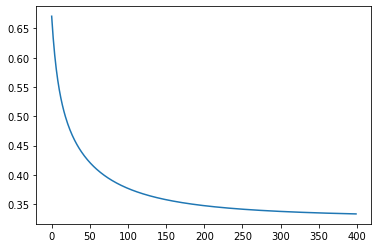

In [23]:
standardize(X_tr)
standardize(X_te)
obj1 = LogisticRegression()
model= obj1.fit(X_tr,y_tr)
y_pred_test_data = obj1.predict(X_te)
y_pred_train_data = obj1.predict(X_tr)
#Let's see the f1-score for training and testing data
f1_score_tr = F1_score(y_tr,y_pred_train_data)
f1_score_te = F1_score(y_te,y_pred_test_data)

print(f1_score_tr)
print(f1_score_te)

import matplotlib.pyplot as plt

plt.plot(model)